#### CS 260 Final Project - Fall 2021
---

# Advanced Baseball Statistical Analysis

### By: Thomas Greve and Ryan Johnson


---

## 1. Introduction:

Major League Baseball (MLB) has been "America's pasttime" since it was founded in 1903. This country's obsession with the game of baseball is largely rooted in the intricacies of the game. For over a century, the same statistics were used to evaluate player performance. Babe Ruth's batting or slugging percentage in 1920 could be compared to Mike Trout's in 2012. However, the world of baseball statistics changed forever when Statcast analytic systems were introduced to all 30 major league ballparks. Since 2015, Statcast has been collecting a multitude of more advanced and complex statistics than traditional measurements could have ever dreamed of. For this project, our group explored a variety of Statcast measurements collected throughout the 2021 MLB season. Our dataset recorded the statistics from all 30 teams in MLB. We examined if these Statcast metrics were valid for evaluating and predicting player performance. 

We explored the following questions relating to these statistics: 

1. **How accurately do Statcast metrics predict actual performance?**
2. **Does a higher launch angle result in more power?**
3. **Does sprint speed strongly correlate with the number of stolen bases?**
4. **How do expected averages (xBA, xSLG) compare with actual averages?**
5. **Do outfielders (LF/CF/RF) have higher outs above average (OAA) than infielders (1B/2B/SS/3B/C)?**
6. **Do players below the age of 30 have a higher average exit velocity than players 30 or older?**

Our initial hypothesis was that Statcast metrics would be a strong and accurate predictor of traditional measurements. We predicted that most Statcast measures that have similarities with traditional measurement would tend to be highly correlated. However, we quickly found that this was not always the case. Let's start by sorting through some data.

---

## 2. Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We compiled two datasets to look at a variety of defensive and offensive baseball statistics. We created custom datasets from BaseballSavant that included all the statistical measurements that we wanted to explore. This is a public database where statisticians and baseball fans alike can explore statistical relationships in virtually every aspect of the game. Statcast collects data using a series of high-resolution optical cameras along with radar equipment. The technology precisely tracks the location and movements of the ball and every player on the field, resulting in an unparalleled amount of information covering everything from the pitcher to the batter to baserunners and defensive players. BaseballSavant has a database that pulls metrics collected from games overnight into a database hosted by Google. They use these metrics to calculate their advanced statistics and compile them into a user-friendly interface. A direct link to the datasets we created from BaseballSavant can be found at the following links: 
 * Defensive statistics: https://baseballsavant.mlb.com/leaderboard/outs_above_average?type=Fielder&startYear=2021&endYear=2021&split=no&team=&range=year&min=10&pos=&roles=&viz=show

 * Offensive Statistics: https://baseballsavant.mlb.com/leaderboard/custom?year=2021&type=batter&filter=&sort=1&sortDir=desc&min=75&selections=xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,&chart=false&x=xba&y=xba&r=no&chartType=beeswarm

 
This data was collected over the entirety of the 2021 MLB regular season. In the first dataframe, the Defensive Statistics dataset includes all players (500) with a minimum of 10 fielding attempts. In the second dataframe, the Offensive Statistics dataset includes all players (495) with a minimum of 75 plate appearances throughout the season. We used an outer join to combine both dataframe in the third and final dataframe that includes all the statistics we wanted to explore.

In [ ]:
# The first dataframe primarily focuses on the fielding information, including the 'Primary Position' and 'Outs Above Average'
defense= pd.read_csv("https://raw.githubusercontent.com/rjohndesales/Data-Project/main/OAA%20and%20Team%20Name.csv")
defense['Player'] = defense[' first_name'] + ' ' + defense['last_name']
defense = defense.rename(columns={'display_team_name':'Team', 'primary_pos_formatted':'Position', 'outs_above_average':'OAA'})
defense

,last_name,first_name,player_id,Team,year,Position,fielding_runs_prevented,OAA,outs_above_average_infront,outs_above_average_lateral_toward3bline,outs_above_average_lateral_toward1bline,outs_above_average_behind,outs_above_average_rhh,outs_above_average_lhh,actual_success_rate_formatted,adj_estimated_success_rate_formatted,diff_success_rate_formatted,Player
0,Abreu,José,547989,White Sox,NaN,1B,0,0,1,-2,0,1,2,-2,73%,73%,0%,José Abreu
1,Acuña Jr.,Ronald,660670,Braves,NaN,CF,1,1,1,0,-2,2,1,-1,89%,88%,1%,Ronald Acuña Jr.
2,Adames,Willy,642715,---,NaN,SS,-6,-8,-1,1,-7,0,-3,-6,75%,76%,-1%,Willy Adames
3,Adams,Matt,571431,Rockies,NaN,1B,-1,-1,-1,0,0,0,0,0,68%,73%,-5%,Matt Adams
4,Adell,Jo,666176,Angels,NaN,RF,0,0,-1,1,-1,0,0,-1,83%,84%,-1%,Jo Adell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Yastrzemski,Mike,573262,Giants,NaN,RF,6,7,2,4,2,-1,5,2,92%,89%,3%,Mike Yastrzemski
496,Yelich,Christian,592885,Brewers,NaN,LF,2,2,0,0,1,1,2,1,91%,90%,1%,Christian Yelich
497,Young,Andrew,670370,D-backs,NaN,2B,-7,-9,-2,-2,-3,-2,-6,-3,57%,70%,-13%,Andrew Young
498,Zimmer,Bradley,605548,Indians,NaN,CF,7,8,1,3,3,1,6,2,94%,90%,4%,Bradley Zimmer


In [ ]:
# The second dataframe primarily focuses on other batting Statcast metrics, such as 'Batting average', 'Slugging percentage', 'Stolen bases', 'Age', etc.
Statcast_df=pd.read_csv('https://raw.githubusercontent.com/rjohndesales/OAA-and-Team/circleci-project-setup/stats-7.csv')
offense = Statcast_df.drop(columns = ['Unnamed: 17'])
offense['Player'] = offense[' first_name'] + ' ' + offense['last_name']
offense['ba_diff'] = abs(offense['xba'] - offense['batting_avg'])
offense['slg_diff'] = abs(offense['xslg'] - offense['slg_percent'])
offense['attempts'] = offense['r_total_stolen_base'] + offense['r_total_caught_stealing']
offense = offense.rename(columns={'b_home_run':'HR_total', 'r_total_stolen_base':'SB_total', 'player_age':'Age', 'b_total_pa':'PA', 'batting_avg':'AVG', 'slg_percent':'SLG', 'exit_velocity_avg':'Avg_exit_velo', 'launch_angle_avg':'Avg_launch_angle', 'r_total_caught_stealing' : 'caught_stealing'})
offense['sb_percent'] = (offense['SB_total']/ (offense['attempts']))
offense

,last_name,first_name,player_id,year,Age,PA,HR_total,AVG,SLG,caught_stealing,SB_total,xba,xslg,Avg_exit_velo,Avg_launch_angle,hard_hit_percent,sprint_speed,Player,ba_diff,slg_diff,attempts,sb_percent
0,Pujols,Albert,405395,2021,41,296,17,0.236,0.433,0,2,0.256,0.459,90.3,12.0,39.7,22.4,Albert Pujols,0.020,0.026,2,1.000000
1,Cabrera,Miguel,408234,2021,38,526,15,0.256,0.386,0,0,0.231,0.415,91.4,10.0,49.0,23.9,Miguel Cabrera,0.025,0.029,0,NaN
2,Rivera,Rene,425784,2021,38,78,2,0.232,0.362,0,0,0.196,0.334,88.5,13.0,39.5,26.0,Rene Rivera,0.036,0.028,0,NaN
3,Molina,Yadier,425877,2021,39,473,11,0.252,0.370,0,3,0.255,0.405,88.0,15.3,31.6,22.6,Yadier Molina,0.003,0.035,3,1.000000
4,Suzuki,Kurt,435559,2021,38,247,6,0.224,0.342,0,0,0.203,0.308,85.2,14.6,27.2,24.6,Kurt Suzuki,0.021,0.034,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Franco,Wander,677551,2021,20,308,7,0.288,0.463,1,2,0.281,0.414,88.2,9.7,37.6,28.5,Wander Franco,0.007,0.049,3,0.666667
491,Duran,Jarren,680776,2021,25,112,2,0.215,0.336,1,2,0.223,0.306,89.6,7.8,39.7,29.3,Jarren Duran,0.008,0.030,3,0.666667
492,Jeffers,Ryan,680777,2021,24,293,14,0.199,0.401,1,0,0.206,0.415,89.2,14.0,44.0,25.8,Ryan Jeffers,0.007,0.014,1,0.000000
493,Miller,Owen,680911,2021,25,202,4,0.204,0.309,0,2,0.222,0.342,86.4,6.0,32.6,29.1,Owen Miller,0.018,0.033,2,1.000000


In [ ]:
baseball_both = defense.merge(offense, how = "outer", left_on = "player_id", right_on = "player_id")
baseball = baseball_both[['Player_y', 'Team', 'Position', 'Age', 'PA', 'HR_total', 'SB_total', 'attempts', 'AVG', 'SLG', 'OAA', 'sprint_speed', 'xba', 'xslg', 'Avg_exit_velo', 'Avg_launch_angle', 'hard_hit_percent']]
baseball = baseball.rename(columns={'Player_y':'Player'})
baseball

,Player,Team,Position,Age,PA,HR_total,SB_total,attempts,AVG,SLG,OAA,sprint_speed,xba,xslg,Avg_exit_velo,Avg_launch_angle,hard_hit_percent
0,Jose Abreu,White Sox,1B,34.0,659.0,30.0,1.0,1.0,0.261,0.481,0.0,26.5,0.251,0.455,92.0,10.4,49.3
1,Ronald Acuna Jr.,Braves,CF,24.0,360.0,24.0,17.0,23.0,0.283,0.596,1.0,29.4,0.293,0.598,93.8,18.2,54.8
2,Willy Adames,---,SS,26.0,555.0,25.0,5.0,9.0,0.262,0.481,-8.0,28.0,0.236,0.438,89.5,16.8,44.7
3,NaN,Rockies,1B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Jo Adell,Angels,RF,22.0,140.0,4.0,2.0,3.0,0.246,0.408,0.0,29.9,0.254,0.409,86.2,10.1,31.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,Andrew Knizner,NaN,NaN,26.0,185.0,1.0,0.0,0.0,0.174,0.236,NaN,25.7,0.203,0.298,87.5,7.8,36.9
571,Sean Murphy,NaN,NaN,27.0,448.0,17.0,0.0,0.0,0.216,0.405,NaN,25.8,0.239,0.436,89.2,15.4,42.6
572,Will Smith,NaN,NaN,26.0,501.0,25.0,3.0,3.0,0.258,0.495,NaN,27.8,0.249,0.468,90.1,19.4,43.8
573,Alejandro Kirk,NaN,NaN,23.0,189.0,8.0,0.0,0.0,0.242,0.436,NaN,24.7,0.288,0.511,92.3,14.7,46.9


### 2.1 Variables Explained

Below is a list of each variable in the dataset and an explanation of what it represents and how it will be used in our analysis.

* **Player_ID (Index):** the ID number associated with the MLB player
* **Player:** the name of the player according to their last_name, first_name
* **Team:** the most recent team that the player is on
* **Position:** the most common fielding position that the player plays
* **Age:** the age of the player
* **PA:** the number of plate appearances, including those resulting in walks, for the player's season
* **HR_total:** the number of home runs a batter hit in the 2021 season
* **SB_total:** the number of stolen bases a baserunner had in 2021
* **Attempts:** the number of stolen base attempts for a baserunner (stolen bases + caught stealing)
* **BA:** batting average, or number of hits divided by the number of at-bats for a player
* **SLG:** slugging percentage, or percent of hits that go for extra bases
* **OAA:** "the cumulative effect of all individual plays a fielder has been credited or debited with, making it a range-based metric of fielding skill that accounts for the number of plays made and the difficulty of them" ... the higher the outs above average measurement, the better
* **Sprint_speed:** in feet per second, the average speed of a player on the basepath
* **XBA:** expected batting average, measures the likelihood that a batted ball will become a hit
* **XSLG:** expected slugging percentage, measures the likelihood of an extra-base hit formulated using exit velocity, launch angle, certain types of batted balls, and sprint speed
* **Avg_exit_velo:** the average velocity of the ball off of the bat for each batted ball event, excluding foul balls
* **Avg_launch_angle:** the average angle of the ball hit off of the bat for each batted ball even, excluding foul balls
* **Hard_hit_percent:** the percent of a player's batted balls with an exit velocity of 95 mph or greater, excluding foul balls



---

## 3. Results

We wanted to tell a story that gives an in-depth analysis of a comparison between traditional baseball statistical measurements and the new Statcast measures. We began our analysis by exploring one of the most popular new statistics: launch angle. We wanted to explore if average launch angle is highly correlated with a higher home run total or slugging percentage.

**Question 1: Does a higher launch angle result in more power?**

Analysts have been able to pinpoint the narrow range of 25-35 degrees as the sweet spot for home runs, but only when paired with an exit velocity (a measure of the speed of the ball off the bat) of 95 mph or greater. So, we expect our data to show that hitters with an average launch angle between 25 and 35 degrees have a higher number of homeruns than players averaging outside of that range. First, we will look at a histogram showing where most players land in terms of average launch angle. Let's take a look at the distribution for average launch angle:

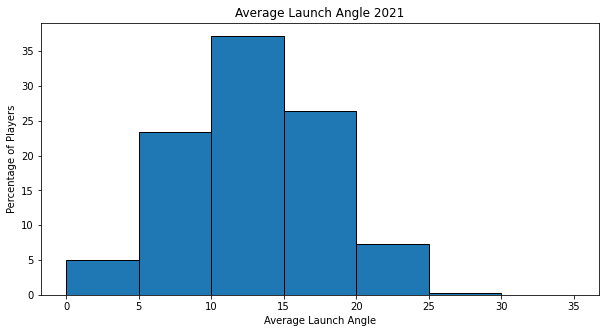

In [ ]:
n = len(offense)
multipliers = np.ones(n)*100/n  

plt.figure(figsize=(10,5))
plt.hist(offense['Avg_launch_angle'], edgecolor = 'black', 
bins = np.arange(0,40, 5), weights = multipliers)
plt.xticks(np.arange(0,40,5))
plt.xlabel('Average Launch Angle')
plt.ylabel('Percentage of Players')
plt.title('Average Launch Angle 2021');

This graph shows us a bell curve-like shape, with most of the players falling above 5 degrees and below 20 degrees in terms of average launch angle. This makes sense because as while players aim for the "sweet spot" of 25-35 degrees, the number of groundballs that result will drastically reduce average launch angle. Continuing this discussion, we looked at a scatter plot comparing a player's average launch angle to the amount of homeruns they hit during the 2021 season. Our hypothesis was that the higher a player's average launch angle is, the more total home runs they hit. 

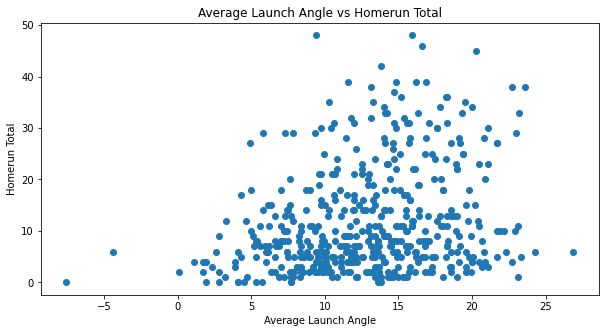

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(offense["Avg_launch_angle"], offense["HR_total"])
plt.xlabel("Average Launch Angle")
plt.ylabel("Homerun Total")
plt.title("Average Launch Angle vs Homerun Total");

We can see a cluster of players below 10 home runs, likely because our data included players with at least 75 plate appearances. This is a small number considering the player with the most plate appearances in 2021 was Freddie Freeman (with 764). He hit 31 homeruns, tied for 31st in MLB, which is an indication that plate appearances and home run totals are not highly correlated. Looking at this graph, there also does not seem to be a strong correlation between average launch angle and the number of homeruns a player hits. In the next cell we will find the correlation coefficient between these variables to put a quantifiable measure to the test. 

In [ ]:
corr_LA_HR = offense[["Avg_launch_angle",'HR_total']].corr()
corr_LA_HR

,Avg_launch_angle,HR_total
Avg_launch_angle,1.000000,0.268732
HR_total,0.268732,1.000000


Here, we see the correlation coefficient between a player's average launch angle and their homerun total for 2021 is about 0.269. This shows a weak, positive linear relationship. So, average launch angle is not a strong predictor of a player's homerun total, even though it appears to have a slight upward trend. We decided to shift our focus to explore another variable that launch angle may impact: slugging percentage. We predicted that launch angle and sluggling percentage may have a higher correlation than with home runs, because home runs exclude all other extra base hits that may have a higher launch angle. Let's take a look at the following graph to see the results:

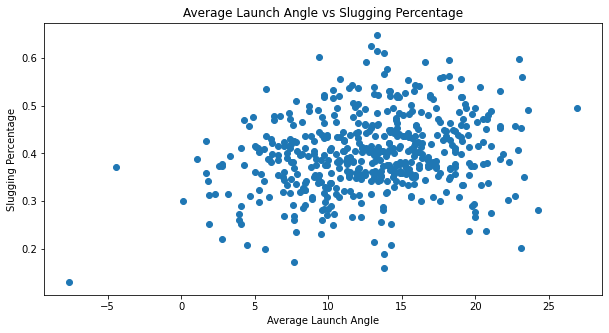

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(offense["Avg_launch_angle"], offense["SLG"])
plt.xlabel("Average Launch Angle")
plt.ylabel("Slugging Percentage")
plt.title("Average Launch Angle vs Slugging Percentage");

This graph looks like it is returning essentially the same results. As average launch angle increases, the slugging percentage tends to also increase. This makes sense, considering the pattern we just found with home runs and launch angle. Let's look at the correlation with slugging percentage to see if it is any stronger than the correlation with home runs:

In [ ]:
corr_LA_SLG = offense[["Avg_launch_angle",'SLG']].corr()
corr_LA_SLG

,Avg_launch_angle,SLG
Avg_launch_angle,1.000000,0.235185
SLG,0.235185,1.000000


To our surprise, the correlation between average launch angle and slugging percentage was actually LOWER than that of launch angle and home run total. Perhaps this makes sense, because extra base hits do not necessarily equate to more fly balls. Many times, hitters will get extra base hits hitting ground balls into the gaps between the outfielders. So, perhaps launch angle is not the best prediction of extra base hits. Maybe it is a matter of pitches hit hard off the bat. We will close this section with a discussion on hard hit balls vs. slugging percentage:

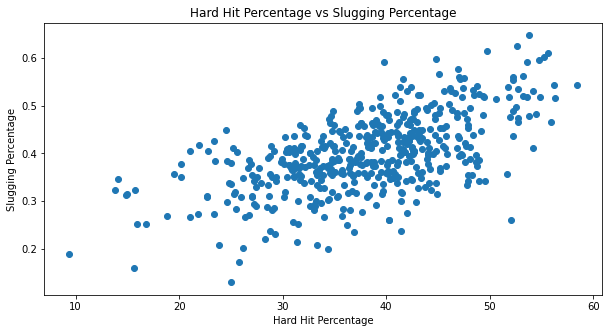

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(offense["hard_hit_percent"], offense["SLG"])
plt.xlabel("Hard Hit Percentage")
plt.ylabel("Slugging Percentage")
plt.title("Hard Hit Percentage vs Slugging Percentage");

Interesting. It seems as though 'Hard Hit Percentage' has a clearer upward trajectory than any of the variables we have explored thus far. As the percentage of hits a batter has that are considered hard hit balls increases, the slugging percentage clearly increases along with it. This might make a little more sense than launch angle, because balls that are hit the hardest are often the hardest to field and would likewise result in more extra base hits than balls that are hit at a higher angle. Let's look at the correlation between these variables:

In [ ]:
corr_HH_SLG = offense[["hard_hit_percent",'SLG']].corr()
corr_HH_SLG

,hard_hit_percent,SLG
hard_hit_percent,1.000000,0.603398
SLG,0.603398,1.000000


This is the highest correlation yet! The percentage of hard hit balls by a player has a moderate positive correlation with their slugging percentage. Contrary to our initial beliefs about launch angle being a better predictor of power, it appears as though balls that are hit harder are the best indicator of power. 

Keeping this in mind, we became very cautious with our predictions with other variables contained in this dataset. At first we wanted to look at power hitting statistics, but then we shifted our focus to baserunning statistics. This led us to our second topic:

**Question 2: Does sprint speed strongly correlate with the number of stolen bases?**

For this question, we are hypothesizing that a player with a high average sprint speed will steal more bases than a player with a lower average sprint speed. This seems logical, as faster players should steal bases with relative ease. First we used the describe function to determine the average sprint speed, in feet per second, to develop an understanding of our data. 

In [ ]:
sprint_speed= offense['sprint_speed'].describe()
sprint_speed

count    495.000000
mean      27.149293
std        1.422319
min       22.400000
25%       26.200000
50%       27.200000
75%       28.200000
max       30.700000
Name: sprint_speed, dtype: float64

This tells us a lot about our data. The mean average sprint speed for the 2021 season is about 27.2 feet per second, with the 75th percentile being about 1 foot per second faster at 28.2 feet per second. Clearly, there are players of all types of speeds in MLB, ranging from 22.4 to 30.7 f/s. We further examined how these speeds relate to a player's base running ability:

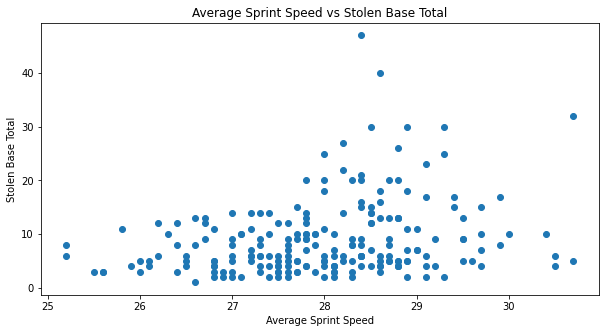

In [ ]:
where_atmp_great_3= offense['attempts']> 3
min_attempts= offense[where_atmp_great_3]
plt.figure(figsize=(10,5))
plt.scatter(min_attempts["sprint_speed"], min_attempts["SB_total"])
plt.xlabel("Average Sprint Speed")
plt.ylabel("Stolen Base Total")
plt.title("Average Sprint Speed vs Stolen Base Total");

Our plate appearance cutoff is at a very low 75 appearances, so many players have not had many chances to steal many bases. To further complicate things, many players only ended up stealing one or two bases and completely skew the data. By excluding some of these players from this visual, we see a somewhat clear upward trend. There seems to be a somewhat higher correlation here than there was between homeruns and average launch angle. To further test this, we will found the correlation coefficient between these two variables. 

In [ ]:
corr_speed_SB = offense[["sprint_speed",'SB_total']].corr()
corr_speed_SB

,sprint_speed,SB_total
sprint_speed,1.000000,0.459874
SB_total,0.459874,1.000000


The correlation coefficient between a player's average sprint speed and total number of stolen bases during the 2021 season is about 0.46. This shows a  moderate positive linear relationship between the variables. This is slightly reassuring of our prediction that average sprint speed is related to the number of stolen bases, but we wanted to dive deeper into this relationship. Instead of looking at a total number of bases stolen, we examined if speed has any relationship with the percentage of stolen bases based off of the number of attempts. It would make sense that slower players have a lower stolen base percentage, right? Let's explore:

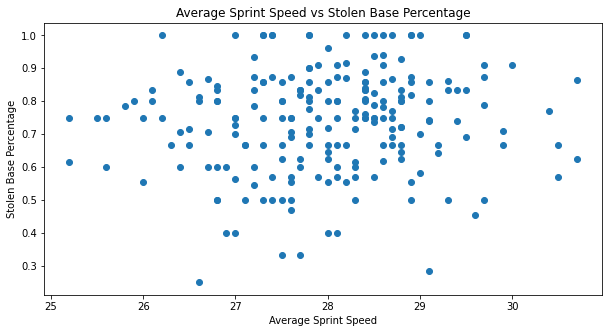

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(min_attempts["sprint_speed"], min_attempts["sb_percent"])
plt.xlabel("Average Sprint Speed")
plt.ylabel("Stolen Base Percentage")
plt.title("Average Sprint Speed vs Stolen Base Percentage");

Wow. This was not what we were expecting to see at all. It appears as though there is barely any relationship between these two variables. We decided to take a look at the correlation coefficient before we jumped to any conclusions:

In [ ]:
corr_speed_perc = offense[["Avg_launch_angle",'SLG']].corr()
corr_speed_perc

,Avg_launch_angle,SLG
Avg_launch_angle,1.000000,0.235185
SLG,0.235185,1.000000


The correlation coefficient hit the nail on the head. There is a weak, albeit positive linear relationship between average sprint speed and percentage of bases stolen successfully. Why could this be? Perhaps players with a higher average sprint speed have more stealing attempts, and are thus more likely to be caught stealing more often as they approach the mean. 

Thus far, these Statcast statistics have not supported our hypothesis too well. There appear to be some positive relationships between these variables that we anticipated, but they were not nearly as strong as we wanted. So, we decided to use some more interesting statistics. In the next section, we explored hitting statistics to explore the relationship between expected and actual batting and slugging averages.

**Question 3: How do expected averages (xBA, xSLG) compare with actual averages?**

Statcast uses batted ball data, such as launch angle and exit velocity, to predict a player's batting statistics. This is what is known as expected batting average (xBA) and expected slugging percentage (xSLG). For this analysis, we will look at how closely a player's xBA and xSLG line up with their actual BA and SLG. We will first showcase both a player's expected and actual results in some side by side plots:

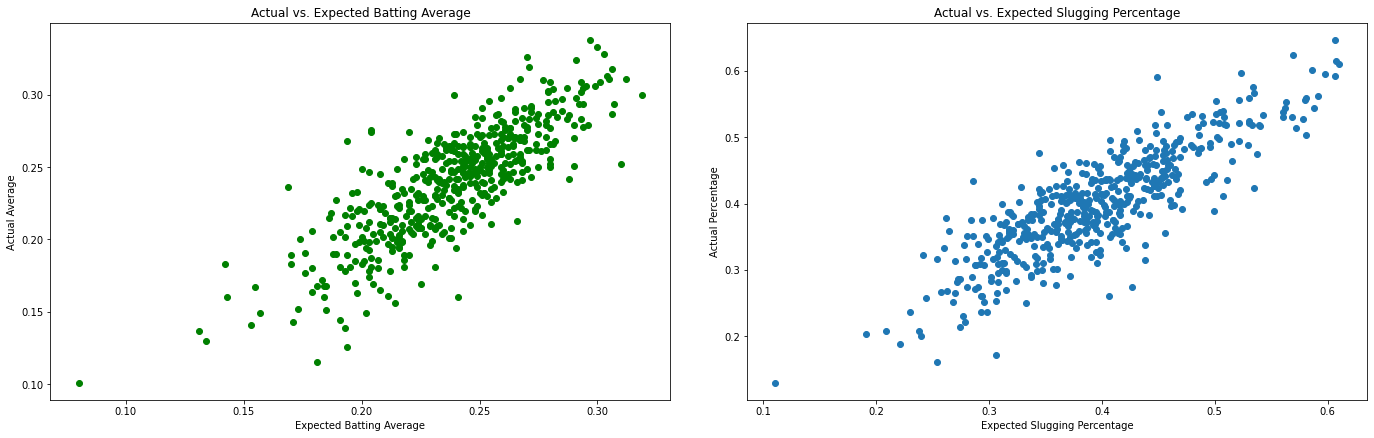

In [ ]:
plt.figure(figsize=(20,7)),
plt.subplot(1, 2, 1)
plt.scatter( offense['xba'],offense['AVG'], c='g')
plt.title('Actual vs. Expected Batting Average')
plt.ylabel('Actual Average')
plt.xlabel('Expected Batting Average') 
plt.subplot(1, 2, 2)
plt.scatter(offense['xslg'], offense['SLG'],)
plt.title('Actual vs. Expected Slugging Percentage')
plt.ylabel('Actual Percentage')
plt.xlabel('Expected Slugging Percentage')
plt.tight_layout(4)
plt.show();

We can see here that there is a clear positive correlation between the expected and average figures. From the looks of the graph, expected batting average is a good predictor of actual batting average. The same applies for expected and actual slugging percentage. Let's take a look at the correlations to see if this is an accurate assertion:

In [ ]:
corr_xBA = offense[["xba",'AVG']].corr()
corr_xBA

,xba,AVG
xba,1.000000,0.821486
AVG,0.821486,1.000000


From this correlation coefficient, we see that expected and actual batting averages have a strong positive correlation. This makes sense, as we would expect these two variables seem highly intertwined. We were a little surprised that this correlation was not higher, making us question the validity of the expected batting average statistic and what it actually intends to measure. Let's see if the correlation brings the same result for slugging percentage:

In [ ]:
corr_xSLG = offense[["xslg",'SLG']].corr()
corr_xSLG

,xslg,SLG
xslg,1.000000,0.850244
SLG,0.850244,1.000000


Indeed, expected and actual slugging percentage have a strong positive linear relationship with each other. In fact, this appears to have a higher correlation than batting average. This is actually rather surprising, considering that slugging percentage tends to have a wider spread or variance than batting average does. We decided that we could plot a histogram to explore the variation between these two relationships and compare them on top of each other. The following graph shows the results of batting average in orange and slugging percentage in blue.

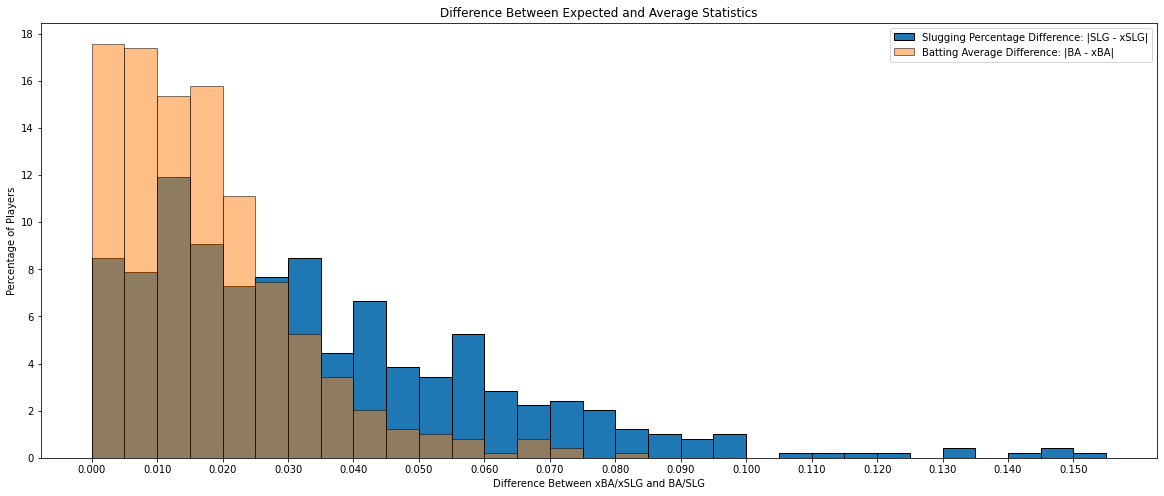

In [ ]:
from matplotlib.ticker import FormatStrFormatter
n = len(offense)
multipliers = np.ones(n)*100/n 

plt.figure(figsize=(20,8))
plt.hist(offense['slg_diff'], edgecolor = 'black', 
bins = np.arange(0,.16,.005), weights = multipliers)
plt.hist(offense['ba_diff'], edgecolor = 'black', 
bins = np.arange(000,.16, .005), weights = multipliers, alpha=0.5)
plt.legend(['Slugging Percentage Difference: |SLG - xSLG|', 'Batting Average Difference: |BA - xBA|'])
plt.xlabel('Difference Between xBA/xSLG and BA/SLG')
plt.ylabel('Percentage of Players')
plt.title('Difference Between Expected and Average Statistics')
plt.xticks(np.arange(0,.16,.010))
plt.yticks(np.arange(000, 20, 2))
ax = plt.gca()
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'));

The difference between expected batting average and actual batting average appears to have a limited range. There are no players with a batting average that was greater than 9 batting points away from their expected batting average. This means that there is less variation among the data, which is also indicated by the higher frequencies at the beginning of the histogram. The difference between expected slugging percentage and actual slugging percentage is much wider, going all the way up to a 15 point difference. There is a much higher degree of variance, and the maximum difference between two of these points is over twice that of the batting averages. This makes sense because slugging percentage can be drastically affected by a variety of factors, moreso than we would expect batting average to be affected.

We finally found a Statcast statistic that is highly predictive of a traditional statistical measurement. From here, we decided to continue our examination to dive deeper into how some of these Statcast measures are calculated and how they may differ by player. We went another direction to fielding statistics to examine the next topic:

**Question 4: Do outfielders (LF/CF/RF) have higher outs above average (OAA) than infielders (1B/2B/SS/3B)?**

Outs Above Average (OAA) is a way of measuring how many more outs a fielder recorded than the average defender. It is practically meaningless at face value without understanding how it is calculated. Here is what OAA represents for different positions: 

*Outfielders*:
Shows the number of outs a player has recorded over the average defender. OAA uses catch probability which combines 1)the time the fielder has to get to the ball, 2)the distance traveled, and 3)the direction traveled. For example, if a batted ball is given a 75% catch probability, the average outfielder will catch the ball 75% of the time. If he catches it, he gets +.25 credit, but if he misses it he gets -.75 credit. 

*Infielders*:
It is a little different for infielders, yet it still relies on similar metrics. The metrics are:
1) Distance needed to travel to the ball, 
2) How much time he has to get there
3) How far he is from the base the runner is running to 
and 4) the average sprint speed of the runner

For this analysis, we will need to perform a groupby to group the players by the primary position they played. This will allow us to analyze the differences between the infield and outfield groups. Let's take a look at the following graph that displays OAA by position:

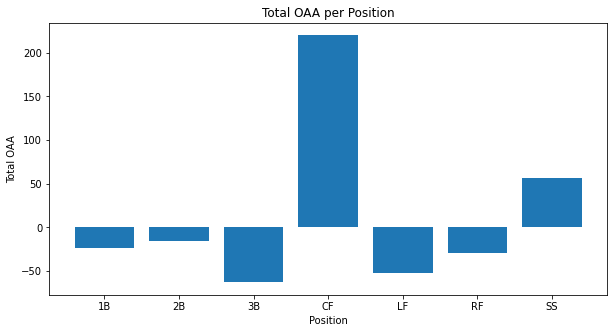

In [ ]:
defense_OAA= defense[["Position","OAA"]]
grpd_position = defense.groupby("Position", as_index= False).sum()
plt.figure(figsize=(10,5))
plt.bar(grpd_position['Position'],grpd_position['OAA'])
plt.title("Total OAA per Position")
plt.ylabel("Total OAA")
plt.xlabel("Position");

This graph may appear weird at first. It is portraying an overall account of OAA for every player grouped by position. This shows us that only centerfielders and shortstops have a positive outs above average total. Perhaps this is because of the nature of the positions; centerfielders and shortstops get the most opportunities to cause an out (by catching a fly ball or fielding a routine ground ball) above all the other positions. These positions tend to be the most talented fielders as well, as they have to facilitate the majority of plays that are hit into the infield or outfield respectively. An examination of total OAA may be useful for showing us which positions are most important or talented, but there is really no standard benchmark to compare individual players. In the next graph, we will examine the average OAA of fielders grouped by position.

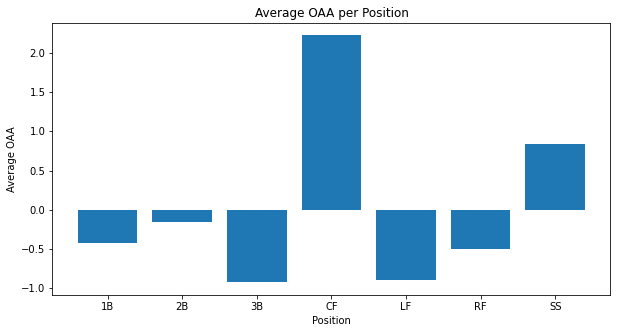

In [ ]:
defense_OAA= defense[["Position","OAA"]]
grpd_pos_avg = defense.groupby("Position", as_index= False).mean()
plt.figure(figsize=(10,5))
plt.bar(grpd_pos_avg['Position'], (grpd_pos_avg['OAA']))
plt.title("Average OAA per Position")
plt.ylabel("Average OAA")
plt.xlabel("Position");

This graphs shows us a slightly more meaningful metric of individual OAA. We see that CFs have about double the average OAA in comparison to shortstops. It also appears as though the spread between the average OAA is not as significant as we may have expected from the graph that displayed the totals. All of these averages are within 3.0 points of each other, making the difference less blatantly obvious. Who knows why this could be? We decided to break down just the centerfielders and shortstops in the next graphic to gain some more insight.

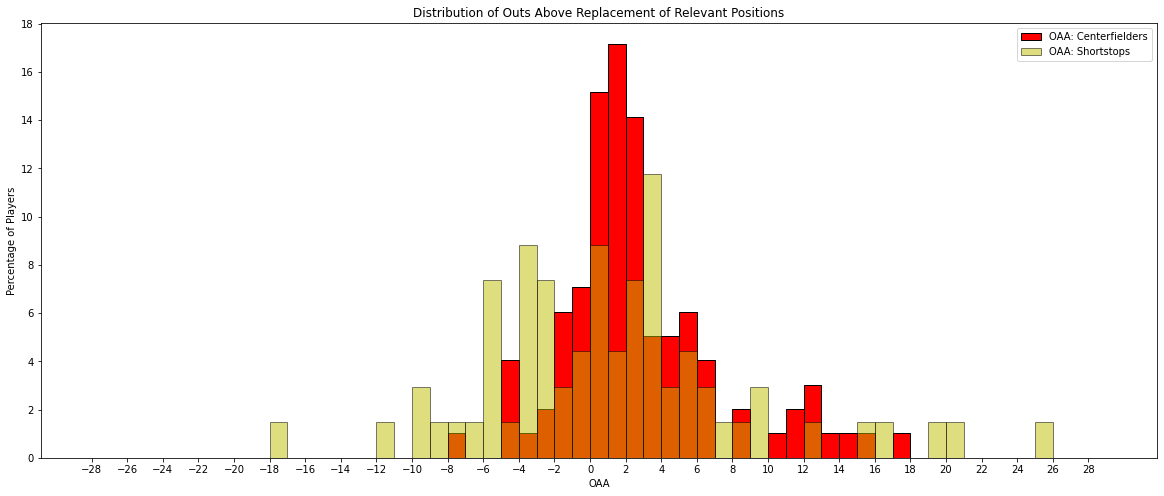

In [ ]:
defense_ss = baseball['Position'] == 'SS'
defense_cf = baseball['Position'] == 'CF'
plt.figure(figsize=(20,8))
n1 = len(baseball[defense_cf]['OAA'])
multipliers_cf = np.ones(n1)*100/n1
n2 = len(baseball[defense_ss]['OAA'])
multipliers_ss = np.ones(n2)*100/n2
plt.hist(baseball[defense_cf]['OAA'], color = 'r', edgecolor = 'black', 
bins = np.arange(-28,30,1), weights = multipliers_cf)
plt.hist(baseball[defense_ss]['OAA'], color = 'y', edgecolor = 'black', 
bins = np.arange(-28,30,1), weights = multipliers_ss, alpha=0.5)
plt.legend(['OAA: Centerfielders', 'OAA: Shortstops'])
plt.xlabel('OAA')
plt.ylabel('Percentage of Players')
plt.title('Distribution of Outs Above Replacement of Relevant Positions')
plt.xticks(np.arange(-28,30,2))
plt.yticks(np.arange(0,20,2));

What can we tell about this distribution? First, we can see that there is much less variation among OAAs in Centerfield. Perhaps this is because the grading system favors this position. It also appears to be more of a normal distribution than the shortstops. While the CF distribution is unimodal, the SS distribution appears bimodal. There is a much wider spread due to many outliers residing on the ends of the spectrum. We see two very different pictures painted by the same statistic at different positions. These Statcast measures are continuing to give us mixed results. We decided to examine one final categorical relatonship in this dataset to see if this trend continues: the relationship between age and other Statcast measures.

**Question 5: Do players below the age of 30 have a higher average exit velocity than players 30 or older?**

For this final analysis, we predict that players who are younger (in this case younger than 30) have a higher average exit velocity than players 30 or older. We believe as players age, they get weaker and slower and are not able to generate as much bat speed as they previously could. We will illustrate this through a scatterplot.

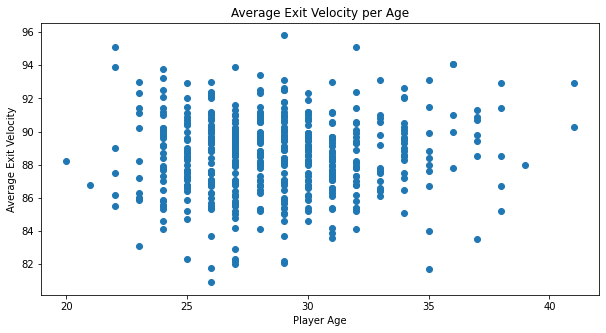

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(offense["Age"], offense["Avg_exit_velo"])
plt.xlabel("Player Age")
plt.ylabel("Average Exit Velocity")
plt.title("Average Exit Velocity per Age");

From this graph, there does not seem to be a significant difference in average exit velocity between players younger than 30 and players 30 or older. We can see this dividing line as the split in the middle, and there does not appear to be much difference on either side. We decided to find the means of these groups to further examine these similarities.

In [ ]:
older_mean_ev= older_df["Avg_exit_velo"].mean()
younger_mean_ev= younger_df["Avg_exit_velo"].mean()

print("The mean average exit velocity among players younger than 30 is " + str(younger_mean_ev) + " and the mean average exit velocity for players 30 or older is " + str(older_mean_ev))

The mean average exit velocity among players younger than 30 is 88.49423076923078 and the mean average exit velocity for players 30 or older is 88.57923497267763


As you can see, there is less than a .1 mph difference in the average exit velocity between the groups. Thus, age has barely any impact on average exit velocity. This was rather disappointing, but we did not give up our search there. We decided to explore if there is a difference between the number of players younger than 30 or 30 or older in terms of the 75th percentile of average exit velocity? We will begin by describing the data.

In [ ]:
EV= offense['Avg_exit_velo'].describe()
EV

count    495.000000
mean      88.525657
std        2.393016
min       80.900000
25%       87.000000
50%       88.600000
75%       90.000000
max       95.800000
Name: Avg_exit_velo, dtype: float64

We can see that there is not a whole lot of variation among these variables. Here, we can pick out that the 75th percentile, or the third quartile, has an average exit velocity of 90 miles per hour. We will further examine just the relationship among the top 25 percent of data.

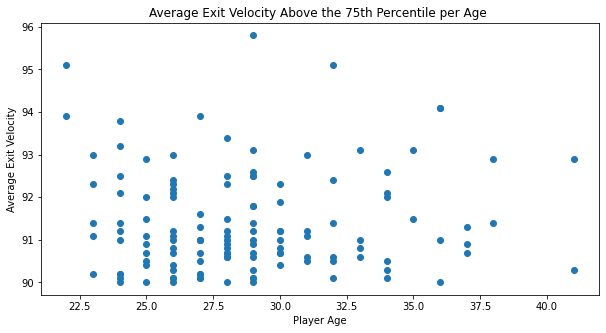

In [ ]:
plt.figure(figsize=(10,5))
where_75th = offense['Avg_exit_velo'] >= 90
age_velo = offense[where_75th]
plt.scatter(age_velo["Age"], age_velo["Avg_exit_velo"])
plt.xlabel("Player Age")
plt.ylabel("Average Exit Velocity")
plt.title("Average Exit Velocity Above the 75th Percentile per Age ");

This scatterplot still appears to be a little sporadic. There does not appear to be much of an association between these two variables. This is rather surprising, considering that we are only looking at the top 25% of hitters, and it still does not decrease much with age. We decided to shift our focus to examine changes that we can actually see with age. We began by examining the quantity of players and how many of those players are within the top 25% of the entire dataset.

In [ ]:
where_younger_30= offense["Age"] < 30
younger_df= offense[where_younger_30]
where_30_or_older= offense["Age"] >= 30
older_df= offense[where_30_or_older]
print('The number of players UNDER the age of 30 is ' + str(len(younger_df)) )
print('The number of players 30 or older is ' + str(len(older_df)) )

The number of players UNDER the age of 30 is 312
The number of players 30 or older is 183


In [ ]:
where_75_young= age_velo['Age']< 30
young_EV= age_velo[where_75_young]

where_75_old= age_velo['Age']>= 30
old_EV= age_velo[where_75_old]


older_length= (len(old_EV)/ len(older_df)) * 100
younger_length= (len(young_EV)/ len(younger_df)) * 100

print("The percent of players younger than 30 with a exit velocity of 90 or above is " + str(younger_length) + "%")
print("The percent of players 30 or older with a exit velocity of 90 or above is " + str(older_length) + "%")

The percent of players younger than 30 with a exit velocity of 90 or above is 27.564102564102566%
The percent of players 30 or older with a exit velocity of 90 or above is 23.497267759562842%


It looks like there is a substantial difference of 4% between the number of players below 30 in the 75th percentile and above 30. This tells us that as players age, the average exit velocity of the top 25%, also known as power hitters, tend to wane in frequency and relativity. Knowing this, is age necessarily a factor in other Statcast categories? We decied to look at sprint speed for the next assessment.

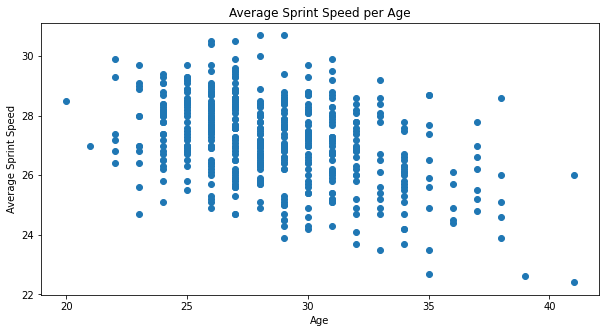

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(offense["Age"], offense["sprint_speed"])
plt.xlabel("Age")
plt.ylabel("Average Sprint Speed")
plt.title("Average Sprint Speed per Age");

There is clearly a downward trend in the relationship between age and average sprint speed. This makes sense, because as people tend to age they generally slow down. We decided to explore the correlation between these variables to see how strongly these two variables are related:

In [ ]:
corr_age_speed = offense[["Age",'sprint_speed']].corr()
corr_age_speed

,Age,sprint_speed
Age,1.000000,-0.402659
sprint_speed,-0.402659,1.000000


These two variables have a moderate negative linear relationship, meaning that as players age, they tend to slow down. This is exactly what we expected, but the finding was not as significant as we had anticipated. Perhaps this is because there are many exceptions to the rules of age.

**CONCLUSION**:


Statcast is a tool used to develop advanced statistics not previously possible, to help determine and better predict player performance. Through our analysis, we tested various of their statistics against actual performance to see if they were an accurate measurement. First, we looked at power statistics and tested to see if launch angle had a significant relationship with homeruns and slugging percentage. We did not find a significant correlation, so we decided that we should switch to looking at a different power statistic - hard hit percentage - and its correlation with slugging percentage. These variables had the highest correlation yet, and it makes sense that hitting the ball hard a higher percentage of the time will lead to more extra base hits. We then focused on another aspect of offense in baserunning, and utilized statcast's sprint speed metric (measured in feet per second) against stolen bases and stolen base percentage. These comparisons did not result in high correlations, and were rather weak. We then switched to looking at batting average and slugging percentage in comparison to their statcast predictors of expected batting average and expected slugging percentage. Both of these relationships showed high linear correlations, indicating that expected batting average and expected slugging percentage are good indicators of actual batting average and actual slugging percentage. We then switched to defense in our analysis. Using Outs Above Average we compared positions, and saw that centerfielders and shortstops led the pack, which is fitting as these are considered the most defensively-minded positions. We finally looked at age and predicted that as a player ages, their skills and physical performance diminished. Looking at average exit velocity, there seemed to be little difference until we researched the 75th percentile of average exit velocity, where players under 30 showed 4% more players than those 30 or older, possibly showing a decrease in power and bat speed as players age. We decided to dive into this analysis by looking at average sprint speed per age, but there did not seem to be a strong correlation. So overall, hard hit percentage seems to be a good indicator of power, expected batting average and expected slugging lined up well with the actual averages, and outs above average furthered the opinion that shortstops and centerfielders are more defensive-minded than other positions. However, the other statistics do not give us a great prediction of actual performance. Overall, statcast seems to have mixed results in predicting actual performance. 